In [2]:
import util.preprocessing as preprocessing
import util.detection_util as detection_util

import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import cv2
import os

import metadataextractor
import util.config as config

from matplotlib import pyplot as plt

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
plt.rcParams['figure.figsize'] = [12, 6]


In [3]:
pre = preprocessing.Preprocessing()
detect = detection_util.DetectionUtil()
img_dic = pre.readImagesRandom()

print (len(img_dic))

df = pd.DataFrame(columns=['id', 'imageName', 'type', 'fsize', 'pigname', 'setversion', 'createdate', 'img_width',
                           'img_height', 'sharpness', 'flash', 'bright', 'contrast', 'sex', 'weight', 'age'])
i = 0


df['fsize'].apply(pd.to_numeric)

2021-04-01 23:40:12,961 - util.preprocessing - INFO - init Preprocessing
2021-04-01 23:40:12,968 - util.detection_util - INFO - init DetectionUtil
2021-04-01 23:40:12,977 - util.preprocessing - INFO - readImages
2021-04-01 23:40:12,978 - util.preprocessing - INFO - image_dir: D:\Users\avatar\OneDrive - Hochschule Luzern\bearbeitet_mit_label\train
10


Series([], Name: fsize, dtype: object)

In [4]:
def showOpenCvImage(img_before, img_after):
    plt.figure(1)
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(img_before, cv2.COLOR_BGR2RGB))
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(img_after, cv2.COLOR_BGR2RGB))
    plt.show()

In [5]:
def getMaxOfColumnAndShowImage(columnName):
    print('Maximum of Column: ', columnName)
    column = df[columnName]
    max_index = column.idxmax()
    max_value = column.max()
    print ('Index of Max:', max_index, ' Value of Max: ', max_value)
    print (df.loc[max_index])
    imageNameOfLoc = df.loc[max_index]['imageName']
    plt.imshow(img_dic[imageNameOfLoc])
    return imageNameOfLoc

In [6]:
def getMinOfColumnAndShowImage(columnName):
    print('Minimum of Column: ', columnName)
    column = df[columnName]
    min_index = column.idxmin()
    min_value = column.min()
    print ('Index of Min:', min_index, ' Value of Min: ', min_value)
    print (df.loc[min_index])
    imageNameOfLoc = df.loc[min_index]['imageName']
    plt.imshow(img_dic[imageNameOfLoc])
    return imageNameOfLoc

In [7]:
for key in img_dic:
    img = img_dic[key]
    img_with_path = os.path.join(config.image_train_dir_path, key)
    size = os.stat(img_with_path).st_size
    pig_name = detect.getPigName(key)
    set_version = detect.getSetVersion(key)
    meta = metadataextractor.MetadataExtractor(img_with_path)
    create_date = meta.getCreateDate()
    img_width = meta.getImageWidth()
    img_height = meta.getImageHeight()
    flash = meta.getFlashMode()
    shrp = pre.computeSharpness(img)
    bright = pre.getBrightness(img)
    contrast = pre.getContrast(img)
    sex = 1
    age = 90
    weight = 100

    df.loc[str(i),:] = [i, key, 'jpg', size, pig_name, set_version, create_date, img_width, img_height, shrp, flash,
                        bright, contrast, sex, weight, age]
    image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    print('read image:', str(i))

    i = i + 1

read image: 0
read image: 1
read image: 2
read image: 3
read image: 4
read image: 5
read image: 6
read image: 7
read image: 8
read image: 9


In [8]:
print(df.head().to_string())

  id             imageName type    fsize pigname setversion           createdate img_width img_height   sharpness flash     bright contrast sex weight age
0  0  DSC_V1_6552_2217.JPG  jpg  4083822    6552         V1  2021:02:02 06:59:22      4288       2848   68.244987   [7]  62.859816      1.0   1    100  90
1  1  DSC_V1_6522_1990.JPG  jpg  4626543    6522         V1  2021:02:02 06:27:39      4288       2848   36.351743   [7]   76.32882      1.0   1    100  90
2  2  DSC_V1_6589_2162.JPG  jpg  4102518    6589         V1  2021:02:02 06:51:24      4288       2848   70.191887   [7]  48.080798      1.0   1    100  90
3  3  DSC_V2_6358_2718.JPG  jpg  5845291    6358         V2  2021:03:16 03:24:13      4288       2848  110.595872   [7]  76.177149      1.0   1    100  90
4  4  DSC_V2_6418_2615.JPG  jpg  3594147    6418         V2  2021:03:16 02:52:48      4288       2848   12.024139   [7]  91.405118      1.0   1    100  90


In [9]:
df = df.astype({'id': 'int', 'imageName': 'str', 'type': 'str'})
df['fsize'] = pd.to_numeric(df["fsize"])
df['sharpness'] = pd.to_numeric(df["sharpness"])
df['sharpness'] = df['sharpness'].astype(int) 
df['bright'] = df['bright'].astype(int)
pd.to_numeric(df['sharpness'])
df.dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          10 non-null     int32 
 1   imageName   10 non-null     object
 2   type        10 non-null     object
 3   fsize       10 non-null     int64 
 4   pigname     10 non-null     object
 5   setversion  10 non-null     object
 6   createdate  10 non-null     object
 7   img_width   10 non-null     object
 8   img_height  10 non-null     object
 9   sharpness   10 non-null     int32 
 10  flash       10 non-null     object
 11  bright      10 non-null     int32 
 12  contrast    10 non-null     object
 13  sex         10 non-null     object
 14  weight      10 non-null     object
 15  age         10 non-null     object
dtypes: int32(3), int64(1), object(12)
memory usage: 1.5+ KB


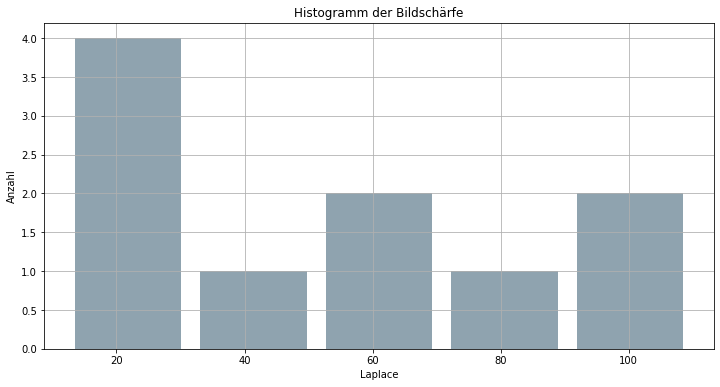

Maximum of Column:  sharpness
Index of Max: 3  Value of Max:  110
id                               3
imageName     DSC_V2_6358_2718.JPG
type                           jpg
fsize                      5845291
pigname                       6358
setversion                      V2
createdate     2021:03:16 03:24:13
img_width                     4288
img_height                    2848
sharpness                      110
flash                          [7]
bright                          76
contrast                       1.0
sex                              1
weight                         100
age                             90
Name: 3, dtype: object


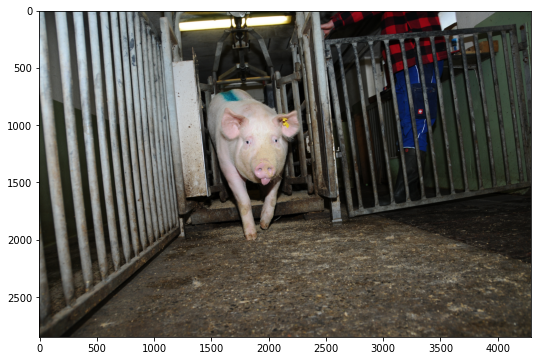

In [10]:
import matplotlib.pyplot as plt
df['sharpness'].hist(bins='auto',color='#607c8e',alpha=0.7, rwidth=0.85)
plt.title('Histogramm der Bildschärfe')
plt.xlabel('Laplace')
plt.ylabel('Anzahl')
plt.show()

image_name_max_sharpness = getMaxOfColumnAndShowImage('sharpness')


Minimum of Column:  sharpness
Index of Min: 4  Value of Min:  12
id                               4
imageName     DSC_V2_6418_2615.JPG
type                           jpg
fsize                      3594147
pigname                       6418
setversion                      V2
createdate     2021:03:16 02:52:48
img_width                     4288
img_height                    2848
sharpness                       12
flash                          [7]
bright                          91
contrast                       1.0
sex                              1
weight                         100
age                             90
Name: 4, dtype: object


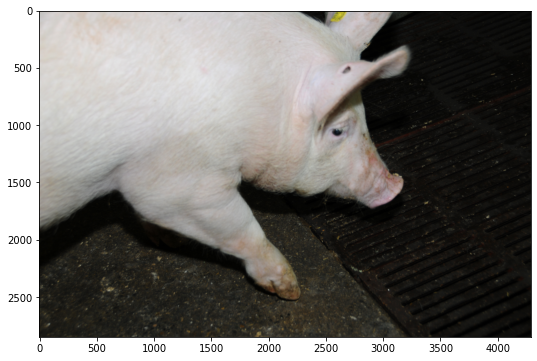

In [11]:
image_name_min_sharpness = getMinOfColumnAndShowImage('sharpness')

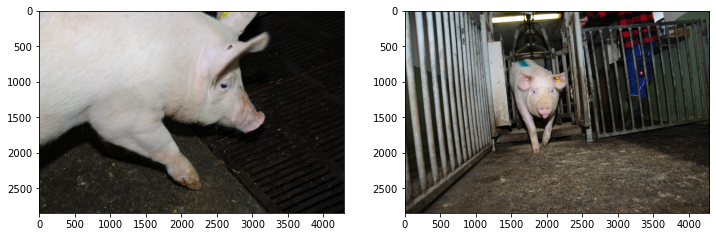

In [12]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_dic[image_name_min_sharpness]);
ax[1].imshow(img_dic[image_name_max_sharpness]);

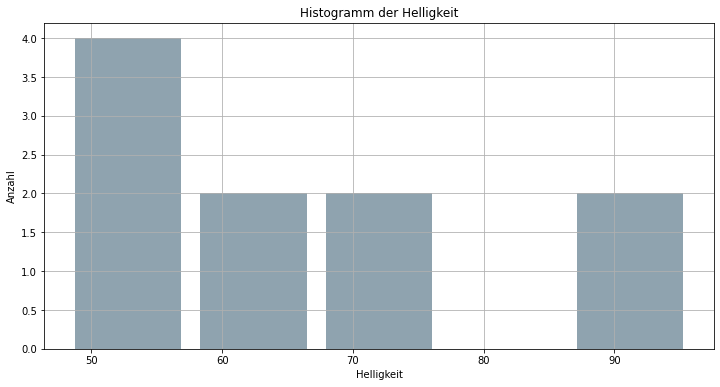

Maximum of Column:  bright
Index of Max: 9  Value of Max:  96
id                               9
imageName     DSC_V2_6422_2672.JPG
type                           jpg
fsize                      5920030
pigname                       6422
setversion                      V2
createdate     2021:03:16 03:13:15
img_width                     4288
img_height                    2848
sharpness                       97
flash                          [7]
bright                          96
contrast                       1.0
sex                              1
weight                         100
age                             90
Name: 9, dtype: object


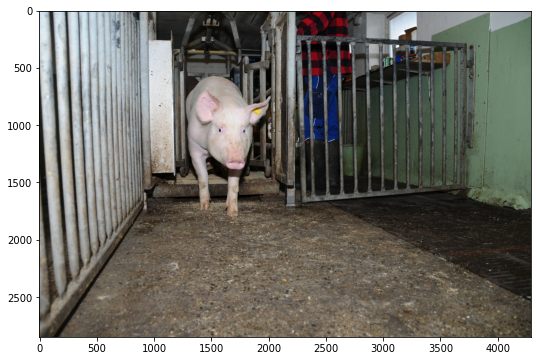

In [13]:
df['bright'].hist(bins='auto',color='#607c8e',alpha=0.7, rwidth=0.85)
plt.title('Histogramm der Helligkeit')
plt.xlabel('Helligkeit')
plt.ylabel('Anzahl')
plt.show()


image_name_max_brightness = getMaxOfColumnAndShowImage('bright')



Minimum of Column:  bright
Index of Min: 2  Value of Min:  48
id                               2
imageName     DSC_V1_6589_2162.JPG
type                           jpg
fsize                      4102518
pigname                       6589
setversion                      V1
createdate     2021:02:02 06:51:24
img_width                     4288
img_height                    2848
sharpness                       70
flash                          [7]
bright                          48
contrast                       1.0
sex                              1
weight                         100
age                             90
Name: 2, dtype: object


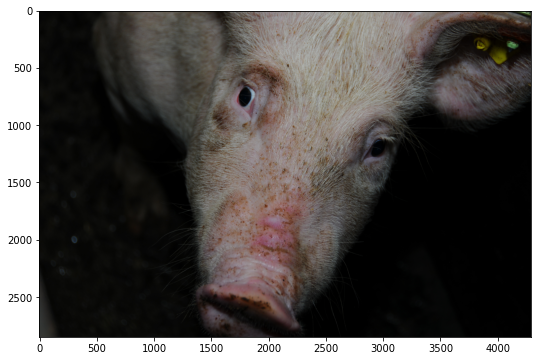

In [14]:
image_name_min_brightness = getMinOfColumnAndShowImage('bright')

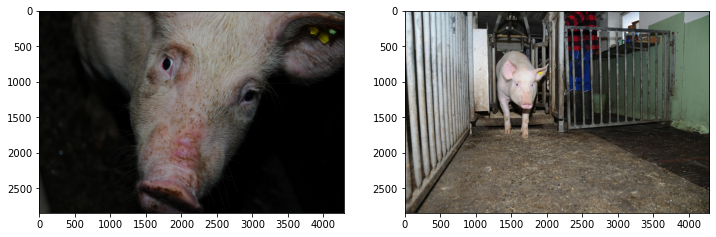

In [15]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_dic[image_name_min_brightness]);
ax[1].imshow(img_dic[image_name_max_brightness]);

In [16]:
df[{'id': 'int', 'imageName': 'str', 'type': 'str', 'pigname': 'str', 'setversion': 'str', 'createdate': 'date', 'img_width': 'int', 'img_height': 'int'}]

,id,imageName,type,pigname,setversion,createdate,img_width,img_height
0,0,DSC_V1_6552_2217.JPG,jpg,6552,V1,2021:02:02 06:59:22,4288,2848
1,1,DSC_V1_6522_1990.JPG,jpg,6522,V1,2021:02:02 06:27:39,4288,2848
2,2,DSC_V1_6589_2162.JPG,jpg,6589,V1,2021:02:02 06:51:24,4288,2848
3,3,DSC_V2_6358_2718.JPG,jpg,6358,V2,2021:03:16 03:24:13,4288,2848
4,4,DSC_V2_6418_2615.JPG,jpg,6418,V2,2021:03:16 02:52:48,4288,2848
5,5,DSC_V1_6525_2511.JPG,jpg,6525,V1,2021:02:02 07:47:03,4288,2848
6,6,DSC_V1_6583_2385.JPG,jpg,6583,V1,2021:02:02 07:24:02,4288,2848
7,7,DSC_V1_6589_2164.JPG,jpg,6589,V1,2021:02:02 06:51:26,4288,2848
8,8,DSC_V1_6520_2158.JPG,jpg,6520,V1,2021:02:02 06:50:17,4288,2848
9,9,DSC_V2_6422_2672.JPG,jpg,6422,V2,2021:03:16 03:13:15,4288,2848
